In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/Advertising.csv')
data.head()

,index_no,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
Y = data['Sales']

In [5]:
X=data[['TV','Radio','Newspaper']]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [12]:
w = np.array((-40, -40,0))
alpha = .1
tolerance = 1e-3
 
old_w = []
errors = []

In [13]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, Y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Error: 727.6376
Iteration: 20 - Error: 280.0123
Iteration: 30 - Error: 215.4987
Iteration: 40 - Error: 203.1176
Iteration: 50 - Error: 200.3282
Iteration: 60 - Error: 199.6477
Iteration: 70 - Error: 199.4750
Iteration: 80 - Error: 199.4304
Iteration: 90 - Error: 199.4188
Iteration: 100 - Error: 199.4157
Iteration: 110 - Error: 199.4149
Iteration: 120 - Error: 199.4147
Gradient Descent has converged
w = [ 3.91907119  2.78495823 -0.01538585]


In [14]:
all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

In [15]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [18]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2,0))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, Y)[1]

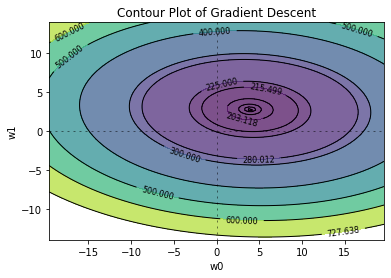

In [20]:
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()